In [1]:
# Imports
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=10, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)

D:\Python\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Convert the data points into a pandas DataFrame
import pandas as pd

# Generate indicators for the data points
obj_names = []
for i in range(1, 11):
    obj = "Object " + str(i)
    obj_names.append(obj)

# Create a pandas DataFrame with the names and (x, y) coordinates
data = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:, 0],
    'Y_value': X[:, -1]
})

# Preview the data
data.head()

,Object,X_value,Y_value
0,Object 1,1.005079,4.594642
1,Object 2,1.128478,4.328122
2,Object 3,2.117881,0.726845
3,Object 4,0.955626,4.385907
4,Object 5,-1.354017,2.769449


In [3]:
# Serialize the DataFrame to a .csv file
data.to_csv('data.csv', index=False)

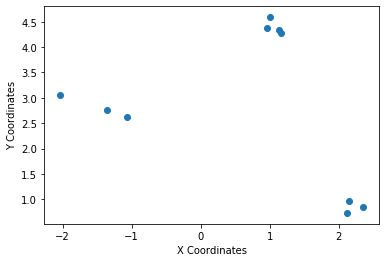

In [4]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

In [6]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [7]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[ 1.06386762,  4.39554682],
       [ 2.20533486,  0.84929168],
       [-1.48815728,  2.81502145]])

In [8]:
# Get the cluster labels
kmeans.labels_

array([0, 0, 1, 0, 2, 2, 2, 1, 1, 0])

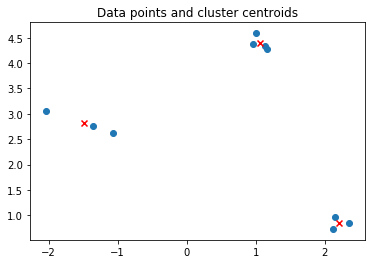

In [9]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()